In [1]:
import os
os.chdir('..')

In [2]:
from eva5_final.config import Config, PlaneRCNNConfig
from eva5_final.dataset import ComboDataset, PlaneRCNNDataset, MidasDataset
import matplotlib.pyplot as plt
import torch
import cv2

# Combo Dataset

In [3]:
d = ComboDataset(Config)
loader = torch.utils.data.DataLoader(d, batch_size=2, shuffle=True, collate_fn=d.collate_fn)
stuff = next(iter(loader))

Caching labels data/mini/yolo/train.txt (64 found, 0 missing, 0 empty, 0 duplicate, for 64 images): 100%|██████████| 64/64 [00:00<00:00, 2034.77it/s]


In [4]:
imgs, midas_data, yolo_data, planercnn_data = stuff
imgs.shape

torch.Size([2, 3, 640, 640])

In [5]:
yolo_data[-1]

((0.0, 114.5), (0.0, 140.5))

In [6]:
yolo_data[-3]

('data/mini/images/images70.jpg', 'data/mini/images/27bb806c8c.jpg')

## Actual input image

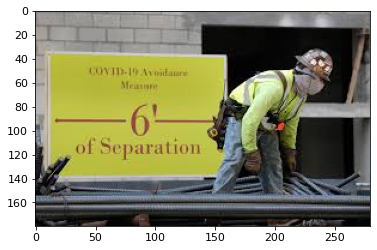

In [7]:
img = cv2.imread(yolo_data[-3][0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Input image from dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


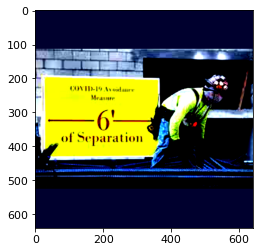

In [8]:
plt.imshow(imgs[0].permute(1, 2, 0))

## Displaying input image without padding

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


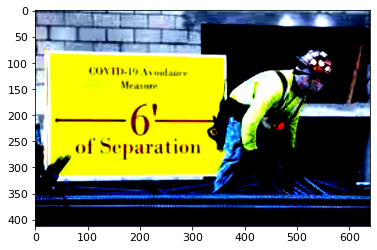

In [9]:
dw = int(yolo_data[-1][0][0])
dh = int(yolo_data[-1][0][1])

if dw == 0:
    plt.imshow(imgs[0].permute(1, 2, 0)[dh:-dh:,:,:])
else:
    plt.imshow(imgs[0].permute(1, 2, 0)[:,dw:-dw,:])

## Yolo Input image

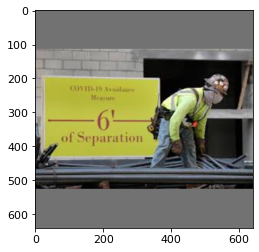

In [10]:
plt.imshow(yolo_data[0][0].permute(1, 2, 0))

## Midas input image and depth

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


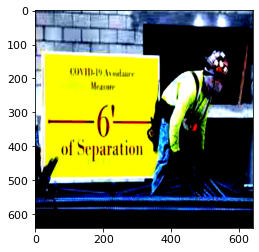

In [11]:
plt.imshow(midas_data[0][0].permute(1, 2, 0))

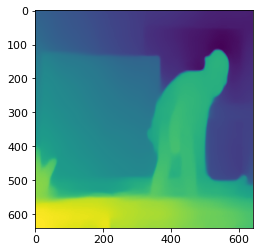

In [12]:
plt.imshow(midas_data[1][0].squeeze())

## PlaneRCNN input image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


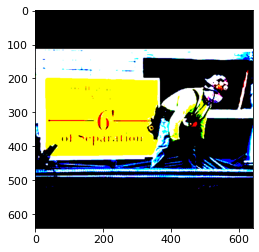

In [13]:
plt.imshow(planercnn_data[0][0][0].permute(1, 2, 0))

# PlaneRCNN Dataset

In [3]:
dataset = PlaneRCNNDataset(PlaneRCNNConfig())
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 16,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
len(stuff)

16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


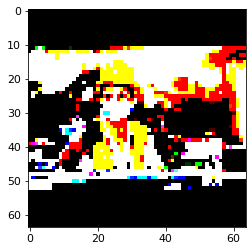

In [6]:
plt.imshow(stuff[0][0][0].permute(1, 2, 0))

In [6]:
for i in range(12):
    print(type(stuff[0][i]))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [7]:
for i in range(12):
    print(stuff[0][i].shape)

torch.Size([1, 3, 640, 640])
torch.Size([1, 16])
torch.Size([1, 102300, 1])
torch.Size([1, 256, 4])
torch.Size([1, 13])
torch.Size([1, 13, 4])
torch.Size([1, 13, 56, 56])
torch.Size([1, 13, 3])
torch.Size([1, 640, 640])
torch.Size([1, 4, 4])
torch.Size([1, 640, 640])
torch.Size([6])


# Midas dataset

In [3]:
dataset = MidasDataset(Config)
loader = torch.utils.data.DataLoader(
    dataset,
    batch_size = 2,
    num_workers = 4,
    shuffle = True,
    pin_memory = True,
    # collate_fn = dataset.collate_fn
)

In [4]:
stuff = next(iter(loader))

In [5]:
stuff[1].shape

torch.Size([2, 1, 416, 416])

In [6]:
stuff[0].shape

torch.Size([2, 3, 416, 416])